## Packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
from skimage.transform import resize
import tensorflow as tf
plt.style.use('ggplot')

/home/sb/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
from my_utils import *

In [4]:
from tensorflow.python.framework import ops

## Fully connected NN

### Reset graph

In [5]:
ops.reset_default_graph()
sess = tf.InteractiveSession()
g = tf.get_default_graph()

### Gaussian distbn (for parameters initialization)

(array([   4.,   24.,   47.,  115.,  218.,  253.,  184.,  110.,   40.,    5.]),
 array([-0.34027186, -0.2764217 , -0.21257155, -0.14872139, -0.08487124,
        -0.02102108,  0.04282907,  0.10667923,  0.17052938,  0.23437954,
         0.29822969]),
 <a list of 10 Patch objects>)

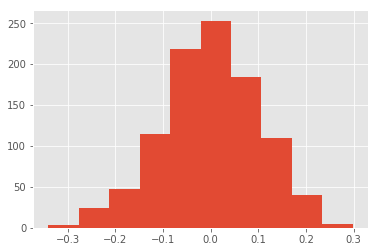

In [6]:
# Parameters initialization
sess = tf.InteractiveSession()
n = tf.random_normal([1000], stddev=0.1).eval()
plt.hist(n)

### Sine wave function to predict

((1000,), (1000,))

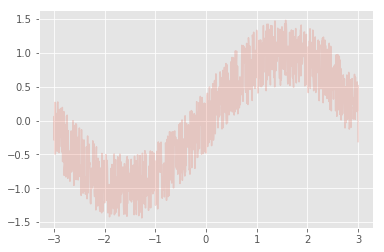

In [7]:
num = 1000
x_sin = np.linspace(-3, 3, num)
y_sin = np.sin(x_sin) + np.random.uniform(-0.5, 0.5, num)
plt.plot(x_sin, y_sin, alpha = 0.20)
x_sin.shape, y_sin.shape

### Linear prediction

0.483772
0.477236
0.471349
0.466098
0.461411
0.457211
0.453413
0.449896
0.446618
0.443626
0.440851
0.438194
0.435787
0.433507
0.431358
0.429397
0.427612
0.425925
0.42443
0.422935


/home/sb/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


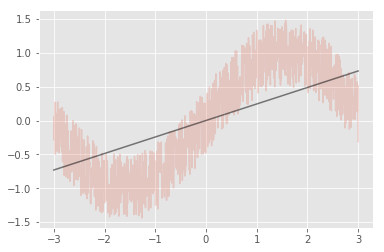

In [8]:
# Input and output
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Parameters
W = tf.Variable(tf.random_normal([1], stddev = 0.1, dtype=tf.float32), name='W')
b = tf.Variable(tf.constant([0], dtype = tf.float32), name = 'b')

# Prediction
Y_pred = W*X + b

# Cost
def l1_dist(pnt1, pnt2):
    return tf.abs(pnt1 - pnt2)
cost = tf.reduce_mean(l1_dist(Y_pred, Y))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# Run iterations of grad descent
num_itns = 20
fig, ax = plt.subplots(1,1)
ax.plot(x_sin, y_sin, alpha = 0.20)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for itn in range(num_itns):
        feed_dict_val = {X: x_sin, Y: y_sin}
        sess.run(optimizer, feed_dict = feed_dict_val)
        train_cost = sess.run(cost, feed_dict = feed_dict_val)
        print(train_cost)
        if itn % 10 == 0:
            y_pred = sess.run(Y_pred, feed_dict = feed_dict_val)
            ax.plot(x_sin, y_pred, 'k', alpha=itn/num_itns)
            fig.show()
            plt.draw()

### Non-linear activation (use mini-batch, modular functions, variable scoping, and multi-layer)

(-1.5, 1.5)

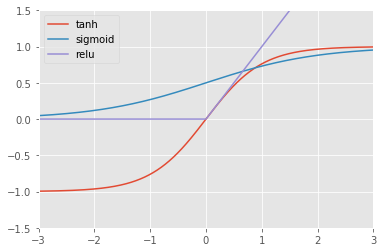

In [9]:
# Activation functions
sess = tf.InteractiveSession()
x_in = np.linspace(-3,3,1000)
plt.plot(x_in, tf.nn.tanh(x_in).eval(), label='tanh')
plt.plot(x_in, tf.nn.sigmoid(x_in).eval(), label='sigmoid')
plt.plot(x_in, tf.nn.relu(x_in).eval(), label='relu')
plt.legend(loc='upper left')
plt.xlim([-3, 3])
plt.ylim([-1.5, 1.5])


In [32]:
# Logistic unit function - includes Parameters and Prediction
def linear_unit(X, num_in, num_out, scope, activ_fn=None):
    with tf.variable_scope(scope):
        W = tf.get_variable(shape=[num_in, num_out], name='W',
                        initializer = tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(shape=[num_out], name = 'b',
                        #initializer = tf.constant_initializer()) 
                        initializer = tf.zeros_initializer())
        z = tf.matmul(X, W) + b
        if activ_fn is not None:
            Y_pred = activ_fn(z)
        else: 
            Y_pred = z
        return Y_pred   
            
# Cost function
def l1_dist(pnt1, pnt2):
    return tf.abs(pnt1 - pnt2)

# Train function - includes NN cost, optimizer, iterations over mini-batches
def train_nn(X, Y, Y_pred, num_itns, batch_size, lr, xin, yin):
    cost = tf.reduce_mean(l1_dist(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = lr).minimize(cost)
    fig, ax = plt.subplots(1,1)
    ax.plot(x_sin, y_sin, alpha = 0.20)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for itn in range(num_itns):
            if batch_size > 0:
                # mini-batch 
                num_batches = len(xin) // batch_size
                rand_idxs = np.random.permutation(range(len(xin)))
                for idx in range(num_batches):
                    batch_idxs = rand_idxs[idx*batch_size : (idx+1)*batch_size]
                    sess.run(optimizer, feed_dict = {X: xin[batch_idxs], Y: yin[batch_idxs]})
            else:
                sess.run(optimizer, feed_dict = {X: xin, Y: yin})
            if itn % 100 == 0:
                train_cost = sess.run(cost, feed_dict = {X:xin, Y:yin})
                print(train_cost)
                y_pred = sess.run(Y_pred, feed_dict = {X: xin})
                ax.plot(x_sin, y_pred, 'k', alpha=itn/num_itns)
    fig.show()
    plt.draw()                

X
Y
layer1/W/Initializer/random_normal/shape
layer1/W/Initializer/random_normal/mean
layer1/W/Initializer/random_normal/stddev
layer1/W/Initializer/random_normal/RandomStandardNormal
layer1/W/Initializer/random_normal/mul
layer1/W/Initializer/random_normal
layer1/W
layer1/W/Assign
layer1/W/read
layer1/b/Initializer/zeros
layer1/b
layer1/b/Assign
layer1/b/read
layer1/MatMul
layer1/add
layer1/Tanh
layer2/W/Initializer/random_normal/shape
layer2/W/Initializer/random_normal/mean
layer2/W/Initializer/random_normal/stddev
layer2/W/Initializer/random_normal/RandomStandardNormal
layer2/W/Initializer/random_normal/mul
layer2/W/Initializer/random_normal
layer2/W
layer2/W/Assign
layer2/W/read
layer2/b/Initializer/zeros
layer2/b
layer2/b/Assign
layer2/b/read
layer2/MatMul
layer2/add
0.597674
0.376542
0.335524
0.298651
0.278484
0.27062
0.267318
0.265634
0.264328
0.263182


/home/sb/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


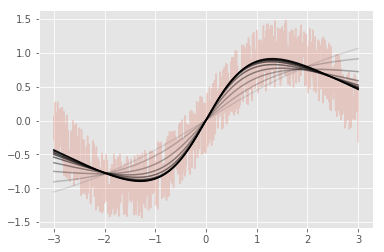

In [33]:
# Reset graph
ops.reset_default_graph()

# Input and output
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Create NN, visualize the graph and train it
A1 = linear_unit(X, 1, 20, 'layer1', tf.nn.tanh)
y_pred = linear_unit(A1, 20, 1, 'layer2', None)
nn_ops = [op.name for op in tf.get_default_graph().get_operations()] 
for nn_op in nn_ops: print(nn_op)

# Train NN
x_sin_m = x_sin[:, np.newaxis]
y_sin_m = y_sin[:, np.newaxis]
train_nn(X, Y, y_pred, 1000, 200, 0.01, x_sin_m, y_sin_m)